In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('Datasets/digit_train.csv')
test_df = pd.read_csv('Datasets/digit_test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <center> **Data Preprocessing** </center>

In [5]:
train = np.array(train_df)
test = np.array(test_df) # test has no label

In [6]:
train_x = train[:,1:]
train_y = train[:,0]

In [7]:
print(train_x.shape)
print(train_y.shape)

(42000, 784)
(42000,)


In [8]:
train_y = np.expand_dims(train_y, 1)

In [9]:
train_y[:5]

array([[1],
       [0],
       [1],
       [4],
       [0]], dtype=int64)

In [10]:
test.shape

(28000, 784)

In [75]:
train_x[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
test[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
def showImage(img):
    plt.figure(figsize=(3,3))
    plt.imshow(img)

# <center> **Neural Network** </center>

In [103]:
%run neural_network.ipynb

In [107]:
number_of_features = train_x.shape[1]
number_of_outputs = len(train_df['label'].unique())

nn = NeuralNetwork(number_of_features, number_of_outputs, loss_function=CrossEntropyLoss(), output_activation_function=SoftmaxActivation())

nn.addHiddenLayer(Layer(10, activation_function=ReLUActivation()))
nn.addHiddenLayer(Layer(10, activation_function=SigmoidActivation()))

In [108]:
nn.evaluate(train_x, train_y, learning_rate=0.5, epochs=10)

C:\Users\Ranjan\AppData\Local\Temp\ipykernel_14916\2563624867.py:3: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-input))


Epoch 0, oveservation 41999 : loss = 51611.985773479235
Epoch 1, oveservation 41999 : loss = 51611.231802001124
Epoch 2, oveservation 41999 : loss = 51610.927083221366
Epoch 3, oveservation 41999 : loss = 51610.729723941284
Epoch 4, oveservation 41999 : loss = 51610.617682062926
Epoch 5, oveservation 41999 : loss = 51610.554407499076


In [99]:
nn.weights[0]

array([[-0.00776469, -0.25307578,  0.02335314, ..., -0.09214367,
         0.27627291,  0.01831115],
       [-0.43083853,  0.44442526, -0.25168613, ...,  0.30463435,
         0.36270707, -0.3980599 ],
       [ 0.02187855, -0.09572516, -0.24074332, ...,  0.06721587,
         0.15686977, -0.14053939],
       ...,
       [-0.26547702,  0.45646783, -0.22715567, ..., -0.22714407,
        -0.1068282 ,  0.17408494],
       [ 0.17369115, -0.11324512, -0.48496889, ...,  0.27994644,
        -0.16019809,  0.21106074],
       [-0.06494739,  0.45972056, -0.31502739, ..., -0.19561825,
         0.2624615 ,  0.18759902]])

In [102]:
nn.weights[0]

array([[-0.00776469, -0.25307578,  0.02335314, ..., -0.09214367,
         0.27627291,  0.01831115],
       [-0.43083853,  0.44442526, -0.25168613, ...,  0.30463435,
         0.36270707, -0.3980599 ],
       [ 0.02187855, -0.09572516, -0.24074332, ...,  0.06721587,
         0.15686977, -0.14053939],
       ...,
       [-0.26547702,  0.45646783, -0.22715567, ..., -0.22714407,
        -0.1068282 ,  0.17408494],
       [ 0.17369115, -0.11324512, -0.48496889, ...,  0.27994644,
        -0.16019809,  0.21106074],
       [-0.06494739,  0.45972056, -0.31502739, ..., -0.19561825,
         0.2624615 ,  0.18759902]])

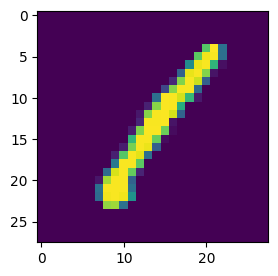

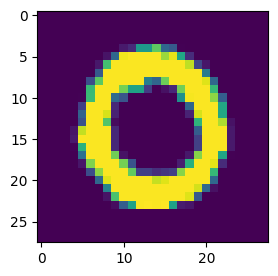

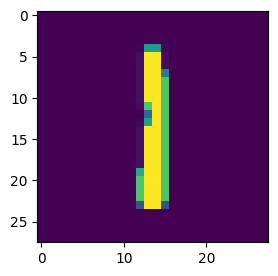

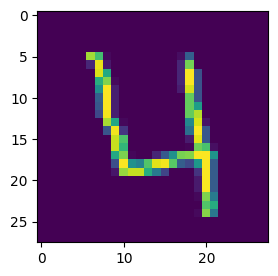

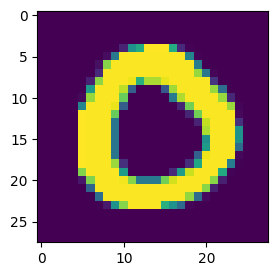

In [82]:
for i in range(5):
    img = np.reshape(train_x[i], (28,28))
    showImage(img)

In [79]:
prob = nn.predict(test)

C:\Users\Ranjan\AppData\Local\Temp\ipykernel_14916\2563624867.py:3: RuntimeWarning: overflow encountered in exp
  res = 1.0 / (1.0 + np.exp(-input))


In [80]:
def getIndex(pred):
    res = 0
    mx = pred[0][0]
    for i in range(1, pred.shape[0]):
        if pred[i][0] > mx:
            res = i
            mx = pred[i][0]
    
    return res

predict int : 9
predict int : 2
predict int : 9
predict int : 4
predict int : 2
predict int : 6
predict int : 9
predict int : 9
predict int : 3
predict int : 9


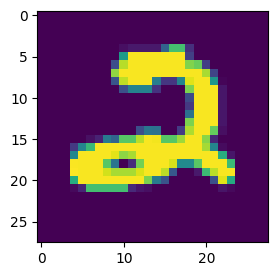

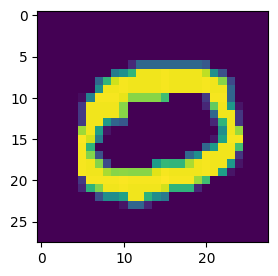

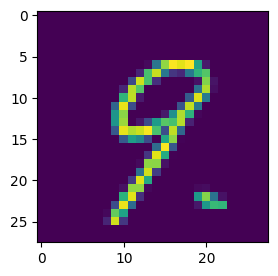

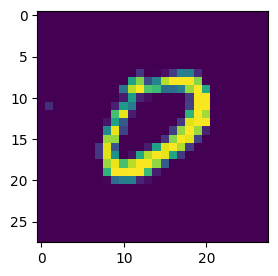

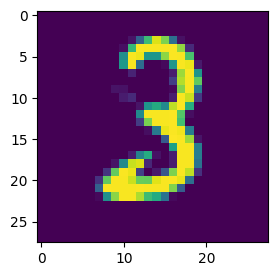

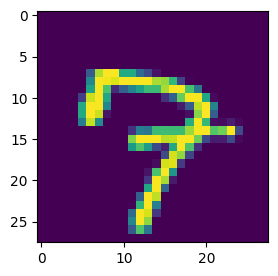

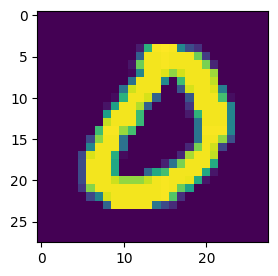

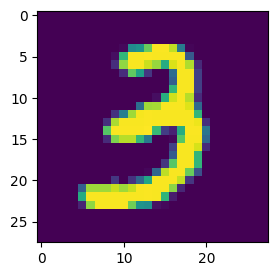

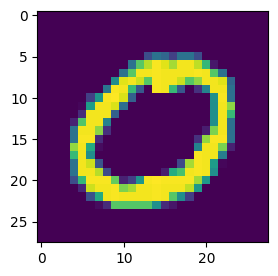

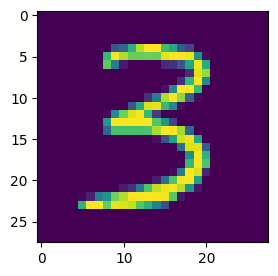

In [86]:
l = len(prob)
for i in range(10):
    pred = getIndex(prob[i])
    img = np.reshape(test[i], (28, 28))
    showImage(img)
    print(f"predict int : {pred}")
